<a href="https://colab.research.google.com/github/chuchun2/ATMS-597-Project-4-Group-C/blob/edit_chuchun/project4_0324_CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

Import Libraries

In [0]:
import tarfile
import pandas as pd
import os

In [0]:
# Import Libraries for section "Linear regression model"
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Set Your Directory

In [0]:
#YOUR_DIRECTORY = '/content/drive/My Drive/Colab Notebooks/ATMS597/project4/' #Sarah
# YOUR_DIRECTORY = '/content/drive/My Drive/Colab Notebooks/ATMS 597/P04/' #Cathy
YOUR_DIRECTORY = '/content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 4/Project 4/' #Chu-Chun

Import GFS data and save to pd.DataFrame

In [3]:
daily = tarfile.open(name = YOUR_DIRECTORY + 'daily.tar.gz') # Set the archive for opening

# Aggregate to PD DataFrame
cur_file = daily.next() # Initiate while loop using the first file in the tar archive
daily_gfs = pd.DataFrame(columns=['TMAX', 'TMIN', 'WMAX', 'RTOT'])
i = 0
while cur_file != None:
    i += 1
    if i % 350 == 0:
        print(float(i/3500))
    working_file = YOUR_DIRECTORY + cur_file.name
    daily.extract(cur_file, path=YOUR_DIRECTORY) # Extract TarInfo Object
    convert_to_df = pd.read_csv(working_file, index_col=0, parse_dates=True, 
                                infer_datetime_format=True) # Convert cur_file 
                                # (TarInfo Object) to string, then to PD; convert
                                # index col to DateTime
    daily_gfs = daily_gfs.append(convert_to_df) # Append PD to DF
    os.remove(working_file) # Remove file extracted in directory
    cur_file = daily.next() # Go to next file in archive

daily_gfs['TMAX'] = daily_gfs['TMAX'].apply(lambda x: (x*(9/5))).apply(lambda x: x+32) # Change TMAX to Celsius
daily_gfs['TMIN'] = daily_gfs['TMIN'].apply(lambda x: (x*(9/5))).apply(lambda x: x+32) # Change TMIN to Celsius
daily.close() # Close .tar

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


In [4]:
daily_gfs

,TMAX,TMIN,WMAX,RTOT
2010-01-01 12:00:00,11.732,2.372,7.323933,0.05
2010-01-02 12:00:00,13.712,3.272,4.687217,0.00
2010-01-03 12:00:00,14.072,6.152,5.941380,0.06
2010-01-04 12:00:00,16.772,8.852,5.685068,0.17
2010-01-05 12:00:00,19.112,12.092,3.794733,0.77
...,...,...,...,...
2020-01-27 12:00:00,33.512,29.732,1.984943,0.29
2020-01-28 12:00:00,34.592,27.392,2.319483,0.57
2020-01-29 12:00:00,36.212,27.572,1.802776,0.00
2020-01-30 12:00:00,37.112,30.092,2.121320,1.13


In [5]:
daily_gfs.index

DatetimeIndex(['2010-01-01 12:00:00', '2010-01-02 12:00:00',
               '2010-01-03 12:00:00', '2010-01-04 12:00:00',
               '2010-01-05 12:00:00', '2010-01-06 12:00:00',
               '2010-01-07 12:00:00', '2010-01-08 12:00:00',
               '2010-01-09 12:00:00', '2010-01-10 12:00:00',
               ...
               '2020-01-22 12:00:00', '2020-01-23 12:00:00',
               '2020-01-24 12:00:00', '2020-01-25 12:00:00',
               '2020-01-26 12:00:00', '2020-01-27 12:00:00',
               '2020-01-28 12:00:00', '2020-01-29 12:00:00',
               '2020-01-30 12:00:00', '2020-01-31 12:00:00'],
              dtype='datetime64[ns]', length=3645, freq=None)

In [8]:
# find missing dates
missing_daily_gfs = pd.date_range(start = '2010-01-01 12:00:00', end = '2020-01-31 12:00:00', freq='D').difference(daily_gfs.index)
missing_daily_gfs
# len(missing_daily_gfs)

DatetimeIndex(['2010-06-20 12:00:00', '2013-08-16 12:00:00',
               '2013-08-17 12:00:00', '2013-08-18 12:00:00',
               '2014-04-05 12:00:00', '2014-05-03 12:00:00',
               '2014-05-04 12:00:00', '2014-05-05 12:00:00',
               '2014-05-06 12:00:00', '2014-05-07 12:00:00',
               '2014-05-08 12:00:00', '2014-05-09 12:00:00',
               '2014-05-10 12:00:00', '2014-05-11 12:00:00',
               '2014-10-11 12:00:00', '2014-12-19 12:00:00',
               '2015-04-18 12:00:00', '2015-06-23 12:00:00',
               '2015-10-10 12:00:00', '2016-04-09 12:00:00',
               '2016-04-10 12:00:00', '2017-04-15 12:00:00',
               '2017-07-19 12:00:00', '2017-07-20 12:00:00',
               '2017-07-21 12:00:00', '2017-07-22 12:00:00',
               '2017-07-23 12:00:00', '2017-07-24 12:00:00',
               '2017-07-25 12:00:00', '2017-07-26 12:00:00',
               '2017-07-27 12:00:00', '2017-07-28 12:00:00',
               '2017-07-

In [9]:
# profile gfs data
prof = tarfile.open(name = YOUR_DIRECTORY + 'prof.tar.gz') # Set the archive for opening

# Aggregate to PD DataFrame
cur_file = prof.next() # Initiate while loop using the first file in the tar archive
prof_gfs = pd.DataFrame(columns=['DWPC','HGHT','PRES','TMPC','UWND','VWND'])
i = 0
while cur_file != None:
    i += 1
    if i % 350 == 0:
        print(float(i/3500))
    working_file = YOUR_DIRECTORY + cur_file.name
    prof.extract(cur_file, path=YOUR_DIRECTORY) # Extract TarInfo Object
    convert_to_df = pd.read_csv(working_file, index_col=0, parse_dates=True, 
                                infer_datetime_format=True) # Convert cur_file 
                                # (TarInfo Object) to string, then to PD; convert
                                # index col to DateTime
    prof_gfs = prof_gfs.append(convert_to_df) # Append PD to DF
    os.remove(working_file) # Remove file extracted in directory
    cur_file = prof.next() # Go to next file in archive

prof.close() # Close .tar

prof_gfs

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


,DWPC,HGHT,PRES,TMPC,UWND,VWND
2010-01-02 06:00:00,"[-17.885416666666668, -22.15150234741784, -38....","[822.2693055555555, 1460.1033333333335, 2904.4...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-16.249583333333334, -16.52291079812207, -21....","[10.566530573750587, 4.214706046596407, 17.668...","[-21.60349159268254, -18.30022411700173, -29.5..."
2010-01-02 09:00:00,"[-19.453124999999996, -24.9388679245283, -42.0...","[822.0543749999998, 1459.7785849056602, 2907.4...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-17.247500000000002, -16.19490566037736, -20....","[13.681992680084207, 9.948942540840713, 19.953...","[-21.05132415236028, -17.798267800386434, -29...."
2010-01-02 12:00:00,"[-24.917708333333334, -29.536603773584904, -42...","[820.327638888889, 1459.582075471698, 2915.667...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-15.991249999999997, -15.280283018867925, -19...","[12.509088069631126, 14.999567192631927, 23.33...","[-25.372665670766228, -22.851012927878898, -32..."
2010-01-02 15:00:00,"[-29.030482758620682, -37.651971830985914, -43...","[826.2597241379308, 1463.5210798122066, 2927.6...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-18.595172413793104, -14.76, -16.487358490566...","[11.080763032604898, 13.737749044170894, 22.27...","[-20.65371472040801, -25.032875351390114, -38...."
2010-01-02 18:00:00,"[-24.84875862068967, -32.677452830188685, -41....","[823.4282758620693, 1458.4197169811318, 2927.1...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-19.58413793103448, -15.190188679245283, -15....","[11.173738737104433, 11.725204010079779, 25.07...","[-14.419104627678692, -22.850212323925128, -37..."
...,...,...,...,...,...,...
2020-02-01 18:00:00,"[-2.420708661417323, -9.530575916230358, -24.0...","[742.415748031496, 1411.5072251308898, 2941.86...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-2.2914960629921257, -2.228062827225135, -8.0...","[19.811216208528656, 21.260362044096723, 30.08...","[1.3604678475628496, -12.77327158763928, -28.9..."
2020-02-01 21:00:00,"[-2.7182608695652157, -14.782617801047117, -18...","[728.3838260869561, 1400.3076963350782, 2936.0...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-2.0765217391304316, -0.4961256544502628, -7....","[23.064567282086532, 29.518982185029717, 36.16...","[0.7999300627093688, -17.180421782239765, -26...."
2020-02-02 00:00:00,"[-2.8084210526315774, -24.81340314136124, -15....","[732.0842105263156, 1408.2601570680624, 2948.3...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-2.6178947368421035, 1.2138219895287963, -6.8...","[25.1585312681121, 28.268556591902666, 33.6927...","[-1.6826343774112273, -18.266906968792057, -26..."
2020-02-02 03:00:00,"[-2.5436842105263135, -20.719368421052636, -8....","[728.0584210526313, 1410.5297894736839, 2954.7...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-0.5178947368421041, 2.6589473684210545, -5.6...","[28.84389310205612, 26.622661595180148, 31.722...","[-1.9461498953626104, -9.480785181647251, -23...."


In [10]:
# find missing times
missing_prof_gfs = pd.date_range(start = '2010-01-02 06:00:00', end = '2020-02-02 06:00:00', freq='6H').difference(prof_gfs.index)
missing_prof_gfs

# the result shows that len(missing_prof_gfs) < 4*len(missing_daily_gfs)...not sure how to go from here.

DatetimeIndex(['2010-06-21 12:00:00', '2010-06-21 18:00:00',
               '2010-06-22 00:00:00', '2013-08-17 12:00:00',
               '2013-08-17 18:00:00', '2013-08-18 00:00:00',
               '2013-08-18 06:00:00', '2013-08-18 12:00:00',
               '2013-08-18 18:00:00', '2013-08-19 00:00:00',
               ...
               '2017-08-02 00:00:00', '2018-04-15 12:00:00',
               '2018-04-15 18:00:00', '2018-04-16 00:00:00',
               '2018-05-13 12:00:00', '2018-05-13 18:00:00',
               '2018-05-14 00:00:00', '2019-04-14 12:00:00',
               '2019-04-14 18:00:00', '2019-04-15 00:00:00'],
              dtype='datetime64[ns]', length=137, freq=None)

In [11]:
# surface gfs data
sfc = tarfile.open(name = YOUR_DIRECTORY + 'sfc.tar.gz') # Set the archive for opening

# Aggregate to PD DataFrame
cur_file = sfc.next() # Initiate while loop using the first file in the tar archive
sfc_gfs = pd.DataFrame()
i = 0
while cur_file != None:
    i += 1
    if i % 350 == 0:
        print(float(i/3500))
    working_file = YOUR_DIRECTORY + cur_file.name
    sfc.extract(cur_file, path=YOUR_DIRECTORY) # Extract TarInfo Object
    convert_to_df = pd.read_csv(working_file, index_col=False).T # Convert cur_file 
                                # (TarInfo Object) to string, then to PD. Note that 
                                # the sfc files are transposed, i.e. they have 
                                # variables as rows and timestamps as columns, hence .T
    sfc_gfs = sfc_gfs.append(convert_to_df) # Append PD to DF
    os.remove(working_file) # Remove file extracted in directory
    cur_file = sfc.next() # Go to next file in archive

sfc.close() # Close .tar

sfc_gfs

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,DWPC,HCLD,LCLD,MCLD,PRCP,PRES,TMPC,UWND,VWND,WSPD
2010-01-02 06:00:00,-13.74,0,100,1,0,1000,-11.26,4.3,-5.4,6.9029
2010-01-02 09:00:00,-15.19,0,100,0,0.04,1000.4,-12.66,4.9,-5.3,7.21803
2010-01-02 12:00:00,-17.91,0,100,0,0.01,1000.7,-14.76,4.2,-6,7.32393
2010-01-02 15:00:00,-20.07,0,8,0,0,1002,-15.76,4.3,-4.5,6.22415
...,...,...,...,...,...,...,...,...,...,...
2020-02-01 18:00:00,0.29,0,100,0,0.01,986.1,3.24,6.7,0.6,6.72681
2020-02-01 21:00:00,-0.62,100,100,0,0.02,984.3,3.04,6.7,0.7,6.73647
2020-02-02 00:00:00,-0.65,100,100,29,0,984.9,1.94,5.4,0.2,5.4037
2020-02-02 03:00:00,-0.77,57,39,22,0,984.3,0.24,3.7,2,4.20595


In [0]:
sfc_gfs.columns = ['DWPC', 'HCLD', 'LCLD', 'MCLD', 'PRCP', 'PRES', 'TMPC', 'UWND', 'VWND', 'WSPD']
sfc_gfs = sfc_gfs.drop('Unnamed: 0')

In [13]:
sfc_gfs.index = pd.to_datetime(sfc_gfs.index)
sfc_gfs.index

DatetimeIndex(['2010-01-02 06:00:00', '2010-01-02 09:00:00',
               '2010-01-02 12:00:00', '2010-01-02 15:00:00',
               '2010-01-02 18:00:00', '2010-01-02 21:00:00',
               '2010-01-03 00:00:00', '2010-01-03 03:00:00',
               '2010-01-03 06:00:00', '2010-01-03 06:00:00',
               ...
               '2020-02-01 06:00:00', '2020-02-01 06:00:00',
               '2020-02-01 09:00:00', '2020-02-01 12:00:00',
               '2020-02-01 15:00:00', '2020-02-01 18:00:00',
               '2020-02-01 21:00:00', '2020-02-02 00:00:00',
               '2020-02-02 03:00:00', '2020-02-02 06:00:00'],
              dtype='datetime64[ns]', length=32805, freq=None)

In [14]:
# find missing times
missing_sfc_gfs = pd.date_range(start = '2010-01-02 06:00:00', end = '2020-02-02 06:00:00', freq='3H').difference(sfc_gfs.index)
missing_sfc_gfs

# the result shows that len(missing_sfc_gfs) < (24/3)*len(missing_daily_gfs)...not sure how to go from here.

DatetimeIndex(['2010-06-21 09:00:00', '2010-06-21 12:00:00',
               '2010-06-21 15:00:00', '2010-06-21 18:00:00',
               '2010-06-21 21:00:00', '2010-06-22 00:00:00',
               '2010-06-22 03:00:00', '2013-08-17 09:00:00',
               '2013-08-17 12:00:00', '2013-08-17 15:00:00',
               ...
               '2018-05-13 21:00:00', '2018-05-14 00:00:00',
               '2018-05-14 03:00:00', '2019-04-14 09:00:00',
               '2019-04-14 12:00:00', '2019-04-14 15:00:00',
               '2019-04-14 18:00:00', '2019-04-14 21:00:00',
               '2019-04-15 00:00:00', '2019-04-15 03:00:00'],
              dtype='datetime64[ns]', length=289, freq=None)

Import obs daily data

In [15]:
daily_obs = pd.read_csv(YOUR_DIRECTORY + 'KCMI_daily.csv', header=4, usecols=[0,1,2,3,4], index_col='Date')[:-7]  # ignore the last 7 lines
daily_obs

,Max Hourly Temp (F),Min Hourly Temp (F),Max Wind Speed (mph),Total Precip (in)
Date,,,,
2010-01-01,12,2,15,M
2010-01-02,6,-5,15,0.00
2010-01-03,10,-6,11,0.00
2010-01-04,11,-2,20,0.00
2010-01-05,10,-1,16,M
...,...,...,...,...
2019-12-27,43,32,15,0.00
2019-12-28,56,32,23,0.23
2019-12-29,59,41,23,0.22


In [0]:
# KCMI_daily.csv is first edited to comment out the last few rows with '#' for
# reindexing and parsing dates (using skipfooter directly did not work). The new
# file is saved as KCMI_daily_comment.csv under Cathy's forked directory.
# daily_obs = pd.read_csv(YOUR_DIRECTORY + 'KCMI_daily_comment.csv', header=4, 
                        # usecols=[0,1,2,3,4], comment='#', index_col=0, parse_dates=True, 
                        # infer_datetime_format=True)
# daily_obs.rename(columns={'TMAX (F)','TMIN (F)','WMAX (mph)','PREC (in)'})
# daily_obs
# daily_obs['Max Daily Temp (C)'] = daily_obs['TMAX'].apply(lambda x: (x*(9/5))).apply(lambda x: x+32) # Change TMAX to Celsius
# daily_gfs['TMIN'] = daily_gfs['TMIN'].apply(lambda x: (x*(9/5))).apply(lambda x: x+32) # Change TMIN to Celsius

,Max Hourly Temp (F),Min Hourly Temp (F),Max Wind Speed (mph),Total Precip (in)
Date,,,,
2010-01-01,12,2,15,M
2010-01-02,6,-5,15,0.00
2010-01-03,10,-6,11,0.00
2010-01-04,11,-2,20,0.00
2010-01-05,10,-1,16,M
...,...,...,...,...
2019-12-27,43,32,15,0.00
2019-12-28,56,32,23,0.23
2019-12-29,59,41,23,0.22


In [16]:
daily_obs.index

Index(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04', '2010-01-05',
       '2010-01-06', '2010-01-07', '2010-01-08', '2010-01-09', '2010-01-10',
       ...
       '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
       '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31'],
      dtype='object', name='Date', length=3652)

In [19]:
# check for missing dates - there's none
missing_dates_obs = pd.date_range(start = '2010-01-01', end = '2019-12-31', freq='D').difference(daily_obs.index)
missing_dates_obs 

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

Import obs hourly data

In [20]:
hourly_obs = pd.read_csv(YOUR_DIRECTORY + 'KCMI_hourly.csv', #header=1, usecols=[0,1,2,3,4], comment='#', 
                         index_col=0, parse_dates=True, infer_datetime_format=True)
hourly_obs

,year,month,day,hour,tmpc,dwpc,mslp,wdir,wspd,skct,pr1h,pr6h,doy,woy
Timestamp,,,,,,,,,,,,,,
2005-12-31 19:00:00,2006,1,1,1,0.6,-1.7,1012.6,220.0,2.1,2.0,0.0,NaN,365,52
2005-12-31 20:00:00,2006,1,1,2,0.0,-1.7,1012.9,160.0,2.1,0.0,0.0,NaN,365,52
2005-12-31 21:00:00,2006,1,1,3,-0.6,-2.2,1013.4,170.0,1.5,0.0,0.0,NaN,365,52
2005-12-31 22:00:00,2006,1,1,4,-1.1,-2.2,1012.9,160.0,3.1,0.0,0.0,NaN,365,52
2005-12-31 23:00:00,2006,1,1,5,-1.1,-2.2,1013.1,160.0,3.1,0.0,0.0,NaN,365,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08 20:00:00,2020,3,9,2,12.2,-1.1,1022.0,180.0,8.2,NaN,NaN,NaN,68,10
2020-03-08 21:00:00,2020,3,9,3,12.2,-1.1,1021.9,180.0,9.8,NaN,NaN,NaN,68,10
2020-03-08 22:00:00,2020,3,9,4,10.6,-0.6,1021.9,180.0,8.8,NaN,NaN,NaN,68,10


Resample hourly precip data into daily freq and add to daily_obs 

In [21]:
hourly_obs_res = hourly_obs.resample('24H',base=12).sum()
precip_daily = hourly_obs_res['pr1h']['2010-01-01 12:00:00':'2019-12-31 12:00:00'].resample('D').sum()
precip_daily

Timestamp
2010-01-01    0.0
2010-01-02    0.0
2010-01-03    0.0
2010-01-04    0.0
2010-01-05   -0.1
             ... 
2019-12-27    0.0
2019-12-28    6.1
2019-12-29    1.0
2019-12-30    0.0
2019-12-31    0.0
Freq: D, Name: pr1h, Length: 3652, dtype: float64

In [22]:
daily_obs['Total Precip from Hourly (in)'] = precip_daily
daily_obs

,Max Hourly Temp (F),Min Hourly Temp (F),Max Wind Speed (mph),Total Precip (in),Total Precip from Hourly (in)
Date,,,,,
2010-01-01,12,2,15,M,0.0
2010-01-02,6,-5,15,0.00,0.0
2010-01-03,10,-6,11,0.00,0.0
2010-01-04,11,-2,20,0.00,0.0
2010-01-05,10,-1,16,M,-0.1
...,...,...,...,...,...
2019-12-27,43,32,15,0.00,0.0
2019-12-28,56,32,23,0.23,6.1
2019-12-29,59,41,23,0.22,1.0


Plot the TMAX from GFS and observation

In [156]:
GFS_TMAX = daily_gfs['TMAX'].loc['2010-01-01 12:00:00':'2018-12-30 12:00:00']  # select 2010-01-01 to 2018-12-30
GFS_TMAX.index = GFS_TMAX.index.map(lambda x: x.strftime('%Y-%m-%d'))  # to be consistent with observation index
GFS_TMAX

2010-01-01    11.732
2010-01-02    13.712
2010-01-03    14.072
2010-01-04    16.772
2010-01-05    19.112
               ...  
2018-12-26    56.192
2018-12-27    52.052
2018-12-28    35.132
2018-12-29    40.712
2018-12-30    41.252
Name: TMAX, Length: 3249, dtype: float64

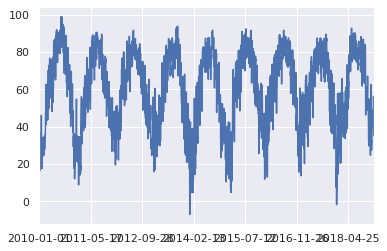

In [157]:
GFS_TMAX.plot()

In [158]:
sum(daily_obs['Max Hourly Temp (F)'] == 'M')

25

In [159]:
# select 2010-01-02 to 2018-12-31 (one day after GFS model)
OBS_TMAX = daily_obs['Max Hourly Temp (F)'].mask(daily_obs['Max Hourly Temp (F)']=='M').dropna().astype('float').loc['2010-01-02':'2018-12-31']
OBS_TMAX

Date
2010-01-02     6.0
2010-01-03    10.0
2010-01-04    11.0
2010-01-05    10.0
2010-01-06    18.0
              ... 
2018-12-26    45.0
2018-12-27    54.0
2018-12-28    51.0
2018-12-29    28.0
2018-12-30    36.0
Name: Max Hourly Temp (F), Length: 3261, dtype: float64

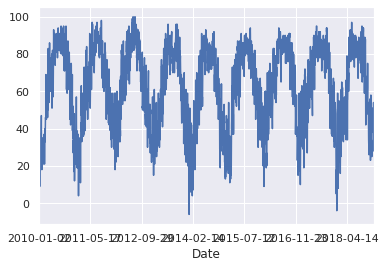

In [160]:
OBS_TMAX.plot()

Find the overlap dates between GFS and observation (one day after GFS model)

In [178]:
# dates_mismatch = OBS_TMAX.index.difference(GFS_TMAX.index)
dates_mismatch = GFS_TMAX.index.difference(OBS_TMAX.index)
dates_mismatch
# len(dates_mismatch)

Index(['2010-01-01', '2011-05-31', '2013-06-26', '2013-12-14', '2014-01-05',
       '2014-09-07', '2014-09-08', '2014-09-09', '2014-09-23', '2014-09-24',
       '2014-09-26', '2014-09-27', '2014-10-01', '2014-10-03', '2014-10-04',
       '2014-10-08', '2014-10-10', '2017-06-26', '2017-10-23', '2017-10-25',
       '2017-12-20', '2018-01-09', '2018-01-10'],
      dtype='object')

In [213]:
GFS_TMAX_dates = pd.to_datetime(GFS_TMAX.index) + pd.Timedelta('1 days')
GFS_TMAX_dates.map(lambda x: x.strftime('%Y-%m-%d'))

Index(['2010-01-02', '2010-01-03', '2010-01-04', '2010-01-05', '2010-01-06',
       '2010-01-07', '2010-01-08', '2010-01-09', '2010-01-10', '2010-01-11',
       ...
       '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
       '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31'],
      dtype='object', length=3249)

In [208]:
type(OBS_TMAX.index)

pandas.core.indexes.base.Index

# Linear regression model


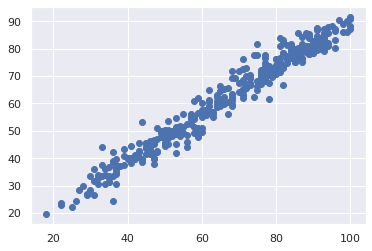

In [144]:
# Line up the TMAX data (the GFS model is one day before the observation)
x = OBS_TMAX  # Observation
y = GFS_TMAX  # GFS model
plt.scatter(x, y)

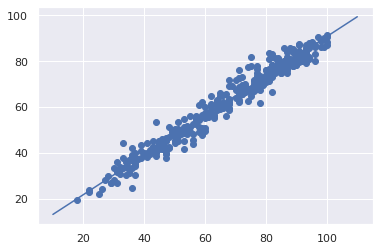

In [152]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(10, 110, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [153]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     0.8627388069737597
Model intercept: 4.546492920567445


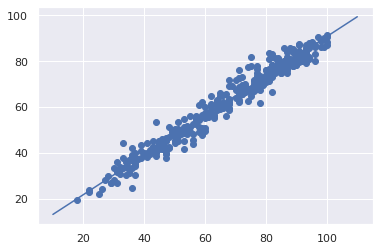

In [155]:
xfit = np.linspace(10, 110, 100)
yfit = model.coef_[0]*xfit + model.intercept_  # model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);